# August 29 Notes

In [41]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from sklearn.datasets import load_iris
iris_dataset['data'].shape

(150, 4)

## Training/Testing Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(iris_dataset.data, iris_dataset.target, random_state=0)

In [20]:
df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.9               3.0                4.2               1.5
1                5.8               2.6                4.0               1.2
2                6.8               3.0                5.5               2.1
3                4.7               3.2                1.3               0.2
4                6.9               3.1                5.1               2.3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e6c1d68>,
      dtype=object)

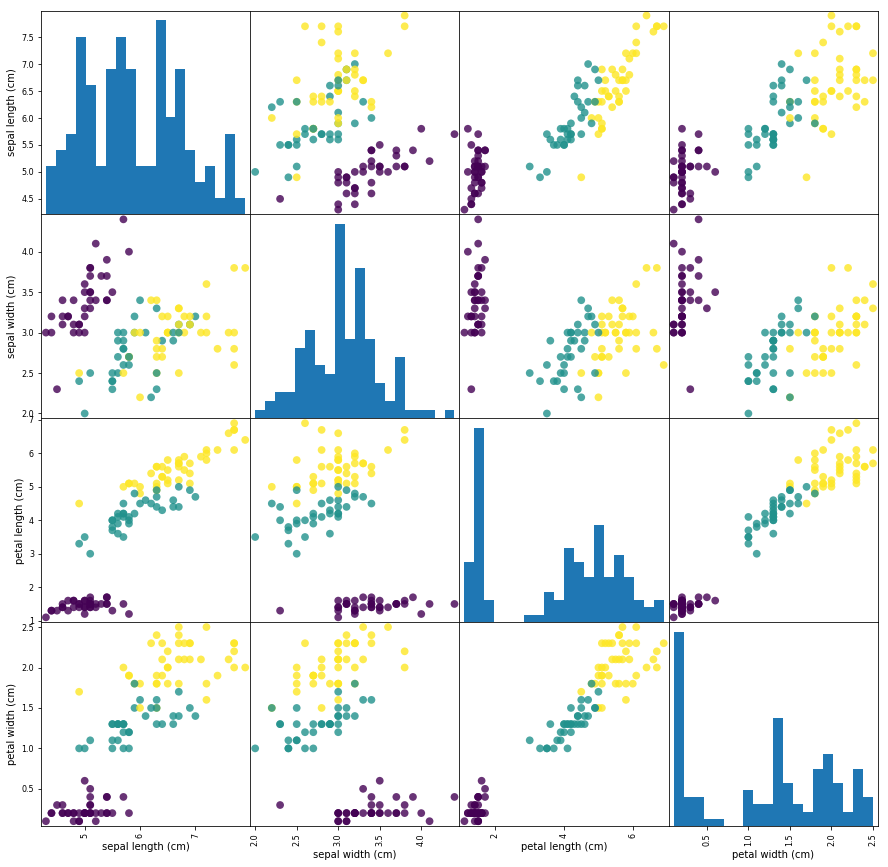

In [21]:
pd.plotting.scatter_matrix(df, c=y_train, figsize=(15,15),
                          marker='o', hist_kwds={'bins': 20},
                          s=60, alpha=.8)

In [24]:
from sklearn.neighbors import KNeighborsClassifier


# Initialize the model
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Predicting

In [29]:
X_new = np.array([[4, 2.7, 0.9, 0.2]])
predicted = knn.predict(X_new)
print(iris_dataset['target_names'][predicted])

['setosa']


In [31]:
print(knn.score(X_test, y_test))

0.9736842105263158


In [33]:
y_pred = knn.predict(X_test)

print(np.mean(y_pred == y_test))

0.9736842105263158


# Regression

In [36]:
import sklearn
dataset = sklearn.datasets.load_boston()
df = pd.DataFrame(dataset.data)
df.columns = dataset.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
print(dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [39]:
df['PRICE'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


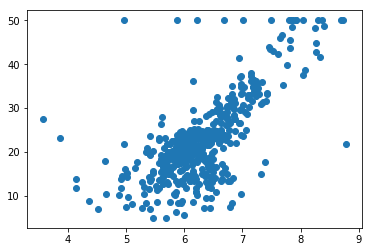

In [42]:
plt.scatter(df.RM, df.PRICE)

In [43]:
X = df.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = \
    train_test_split(X, dataset.target, test_size=0.33, random_state=5)

In [53]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

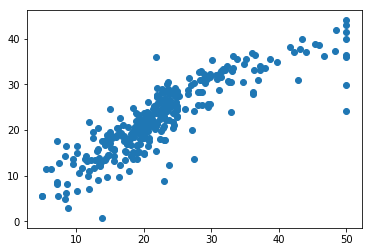

In [54]:
plt.scatter(y_train, lm.predict(X_train))

In [56]:
list(zip(X.columns, lm.coef_))

[('CRIM', -0.15638129739077436),
 ('ZN', 0.03854909722222755),
 ('INDUS', -0.025062992120110344),
 ('CHAS', 0.7864396838814535),
 ('NOX', -12.9469120941517),
 ('RM', 4.002688568664795),
 ('AGE', -0.011602339525426872),
 ('DIS', -1.3682881139733307),
 ('RAD', 0.34175691450062046),
 ('TAX', -0.013514882262925127),
 ('PTRATIO', -0.9888660336412641),
 ('B', 0.0120588214850717),
 ('LSTAT', -0.4726442804017038)]

In [59]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
mse_train = np.mean(((y_train - pred_train) ** 2))
mse_test = np.mean((y_test - pred_test) ** 2)
print(mse_train)
print(mse_test)

19.546758473534663
28.54136727561837


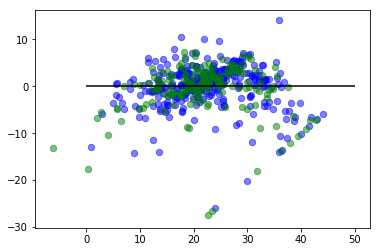

In [60]:
plt.scatter(pred_train, pred_train - y_train, c='b', alpha=.5, s=40)
plt.scatter(pred_test, pred_test - y_test, c='g', alpha=0.5, s=40)
plt.hlines(y=0, xmin=0, xmax=50)